# NLP Project

## Download of the Dataset

In [1]:
from utils.seeder import set_random_seed
SEED = 42

set_random_seed(SEED)

c:\Users\riccardo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

In [3]:
def get_labels_list(row: pd.Series) -> pd.Series:
    return [index for index, value in row.items() if value == 1]

def get_dataframe(data_folder: str, df_type: str) -> pd.DataFrame:
    assert df_type in ['training', 'validation', 'test', 'validation-zhihu'], 'Specify the `df_type` as either training, validation or test'
    
    arguments_df = pd.read_csv(os.path.join(data_folder, f'arguments-{df_type}.tsv'), sep='\t', header=0)
    labels_df = pd.read_csv(os.path.join(data_folder, f'labels-{df_type}.tsv'), sep='\t', header=0)
    
    arguments_df['Labels'] = labels_df.apply(lambda x: get_labels_list(x), axis=1)
    
    arguments_df.drop('Argument ID', axis=1, inplace=True)
    labels_df.drop('Argument ID', axis=1, inplace=True)
    
    return arguments_df, labels_df

In [4]:
arguments_train_df, labels_train_df = get_dataframe('data', 'training')
arguments_test_df, labels_test_df = get_dataframe('data', 'validation')

In [5]:
print('Arguments dataframe structure:')
arguments_train_df.head()

Arguments dataframe structure:


,Conclusion,Stance,Premise,Labels
0,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,[Security: societal]
1,We should ban fast food,in favor of,fast food should be banned because it is reall...,[Security: personal]
2,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,We should ban factory farming,against,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [6]:
print('Labels dataframe structure:')
labels_train_df.head()

Labels dataframe structure:


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [7]:
print(f'Number of rows of the train dataframe: {len(arguments_train_df)}')
print(f'Number of rows of the test dataframe: {len(arguments_test_df)}')

Number of rows of the train dataframe: 5393
Number of rows of the test dataframe: 1896


In [8]:
from sklearn.model_selection import train_test_split

arguments_train_df, arguments_val_df, labels_train_df, labels_val_df = train_test_split(
    arguments_train_df, labels_train_df, test_size=.33, random_state=SEED)

arguments_train_df.reset_index(drop=True, inplace=True)
labels_train_df.reset_index(drop=True, inplace=True)
arguments_val_df.reset_index(drop=True, inplace=True)
labels_val_df.reset_index(drop=True, inplace=True)

In [9]:
print(f'Number of rows of the train dataframe after splitting: {len(arguments_train_df)}')
print(f'Number of rows of the validation dataframe after splitting: {len(arguments_val_df)}')

Number of rows of the train dataframe after splitting: 3613
Number of rows of the validation dataframe after splitting: 1780


In [10]:
import matplotlib.pyplot as plt 

def plot_stance_distribution(arguments_df: pd.DataFrame, title: str = 'Stance distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    arguments_df.Stance.value_counts().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle(title)

    ax.set_xlabel('stance')
    ax.set_ylabel('count')

    plt.tight_layout()


    plt.show()

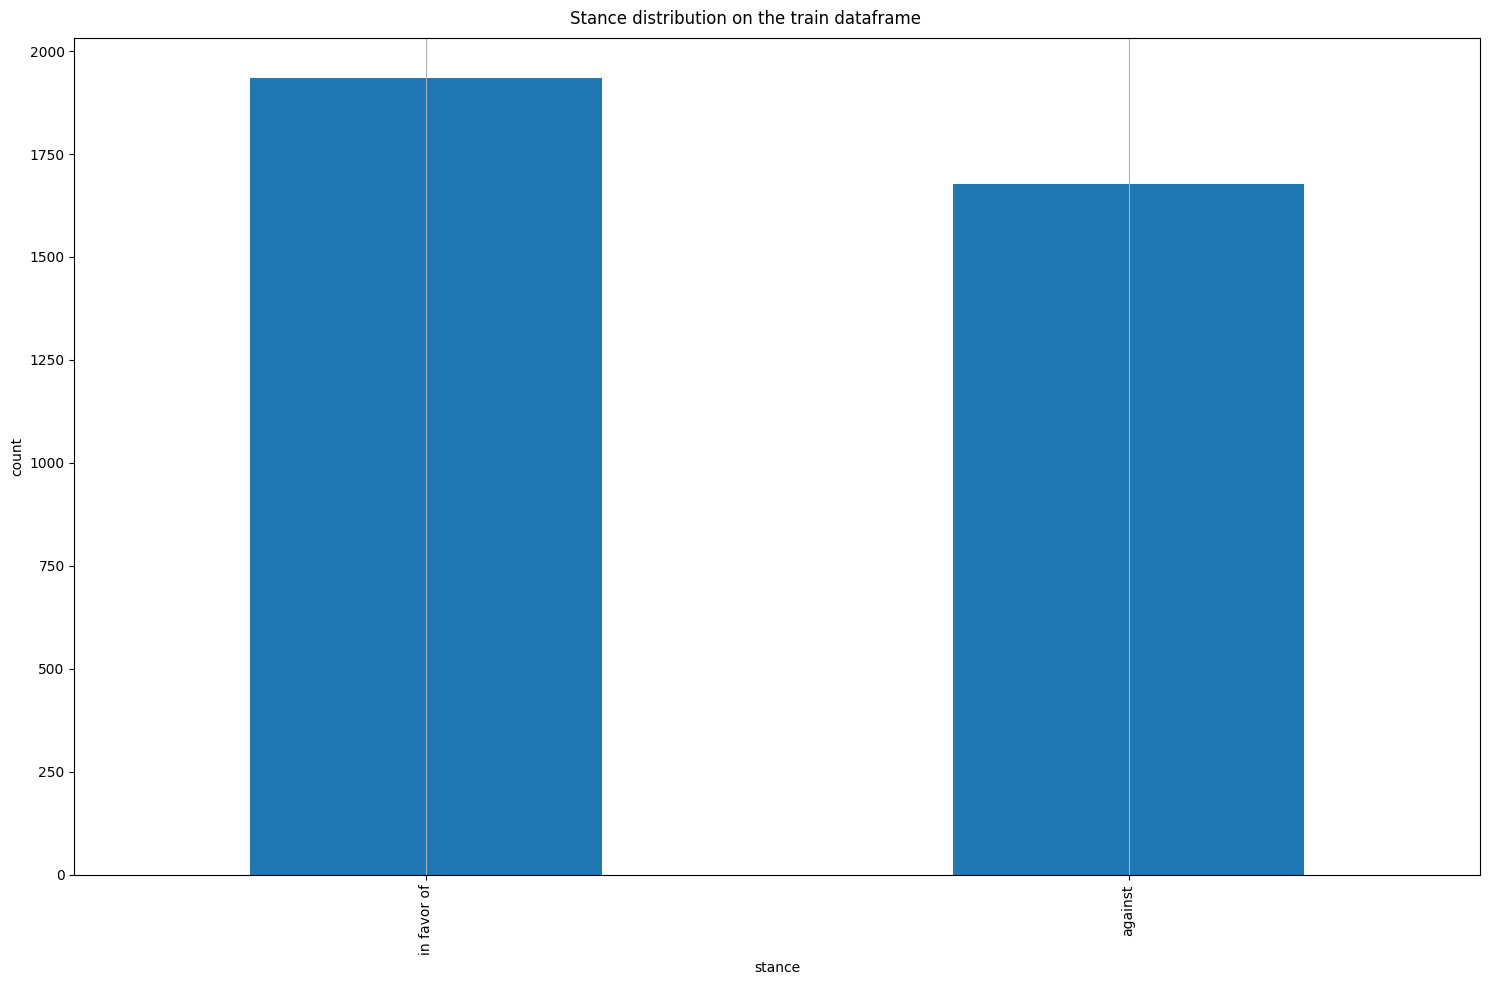

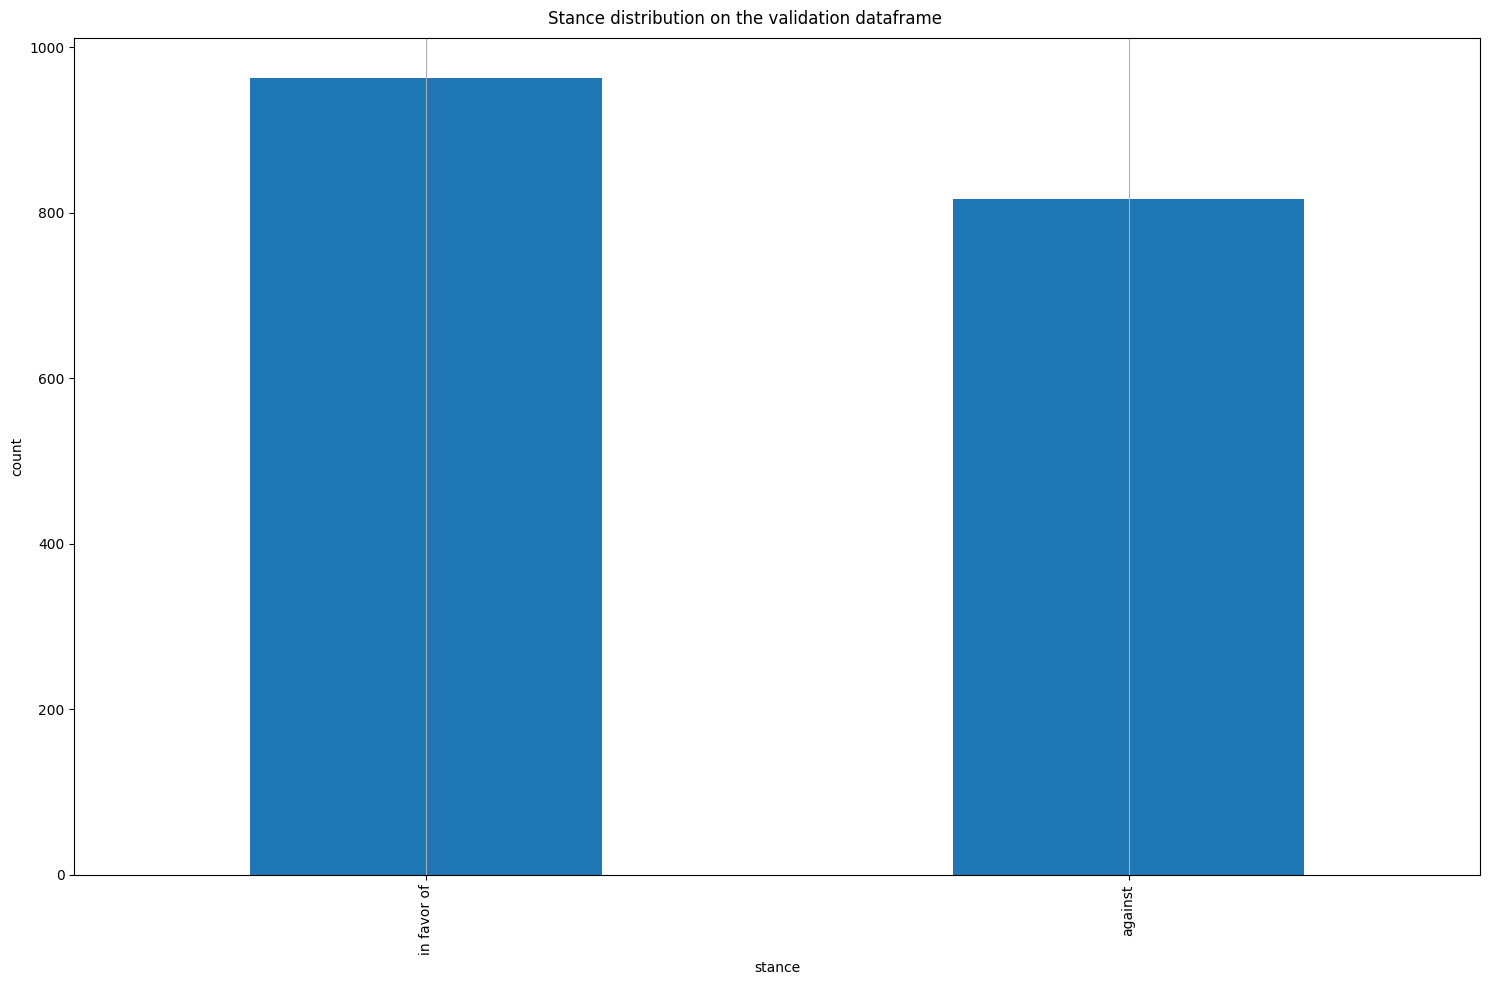

In [11]:
plot_stance_distribution(arguments_train_df, title='Stance distribution on the train dataframe')
plot_stance_distribution(arguments_val_df, title='Stance distribution on the validation dataframe')

In [12]:
import matplotlib.pyplot as plt 

def plot_sentiment_distribution(labels_df: pd.DataFrame, title: str = 'Sentiment values distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    labels_train_df.sum().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle('Sentiment values distribution')

    ax.set_xlabel('sentiment values')
    ax.set_ylabel('count')

    plt.tight_layout()

    plt.show()

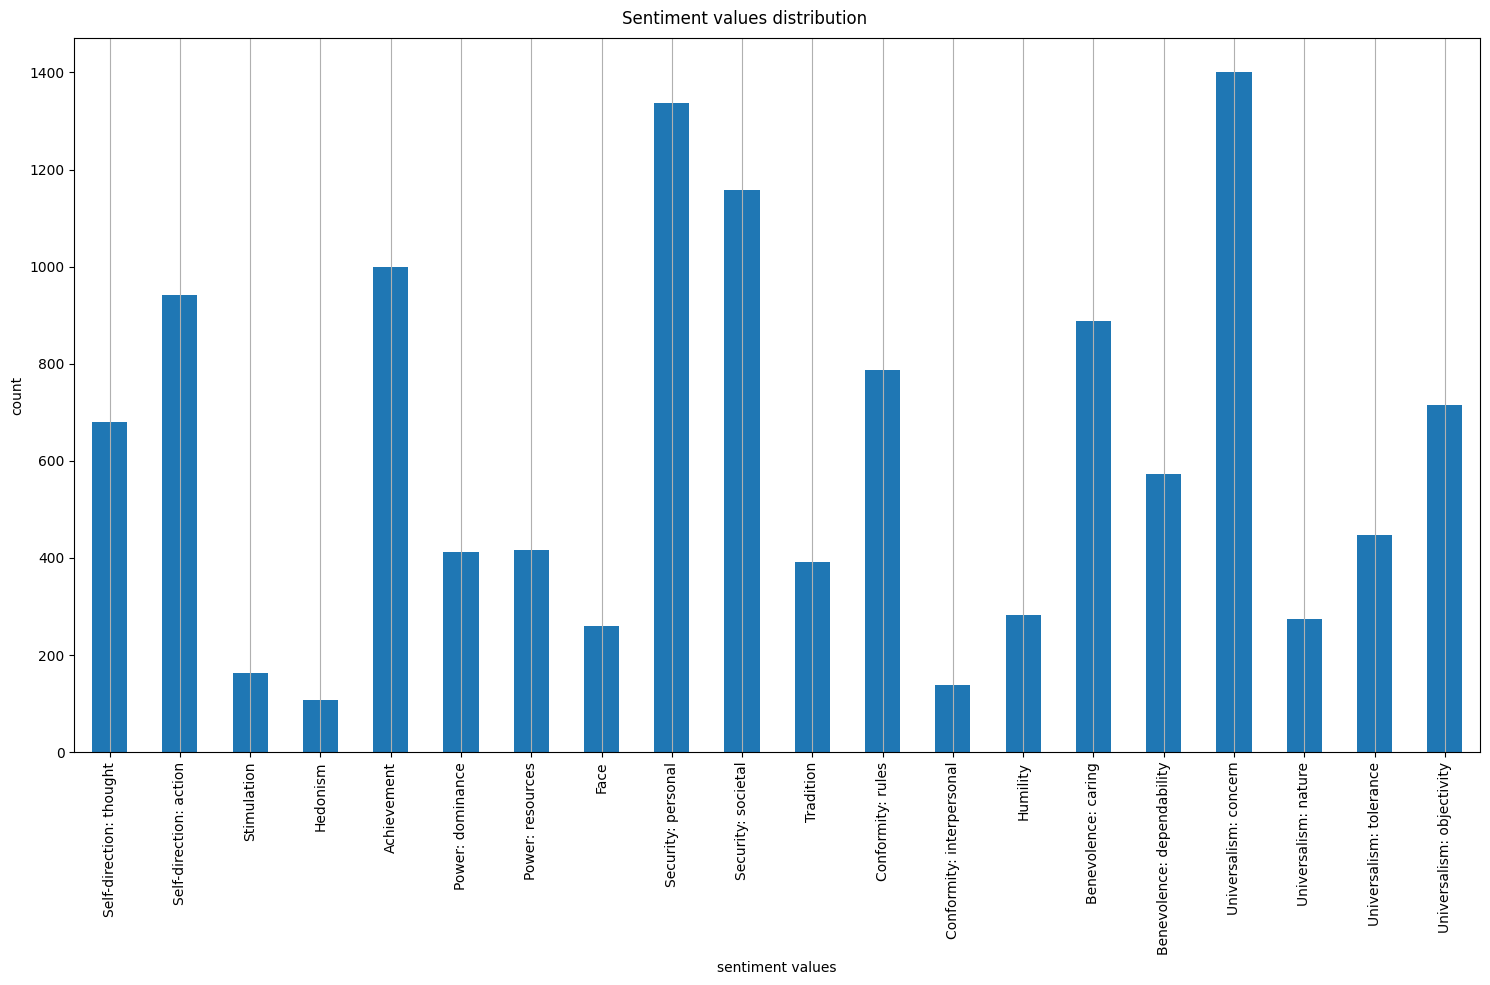

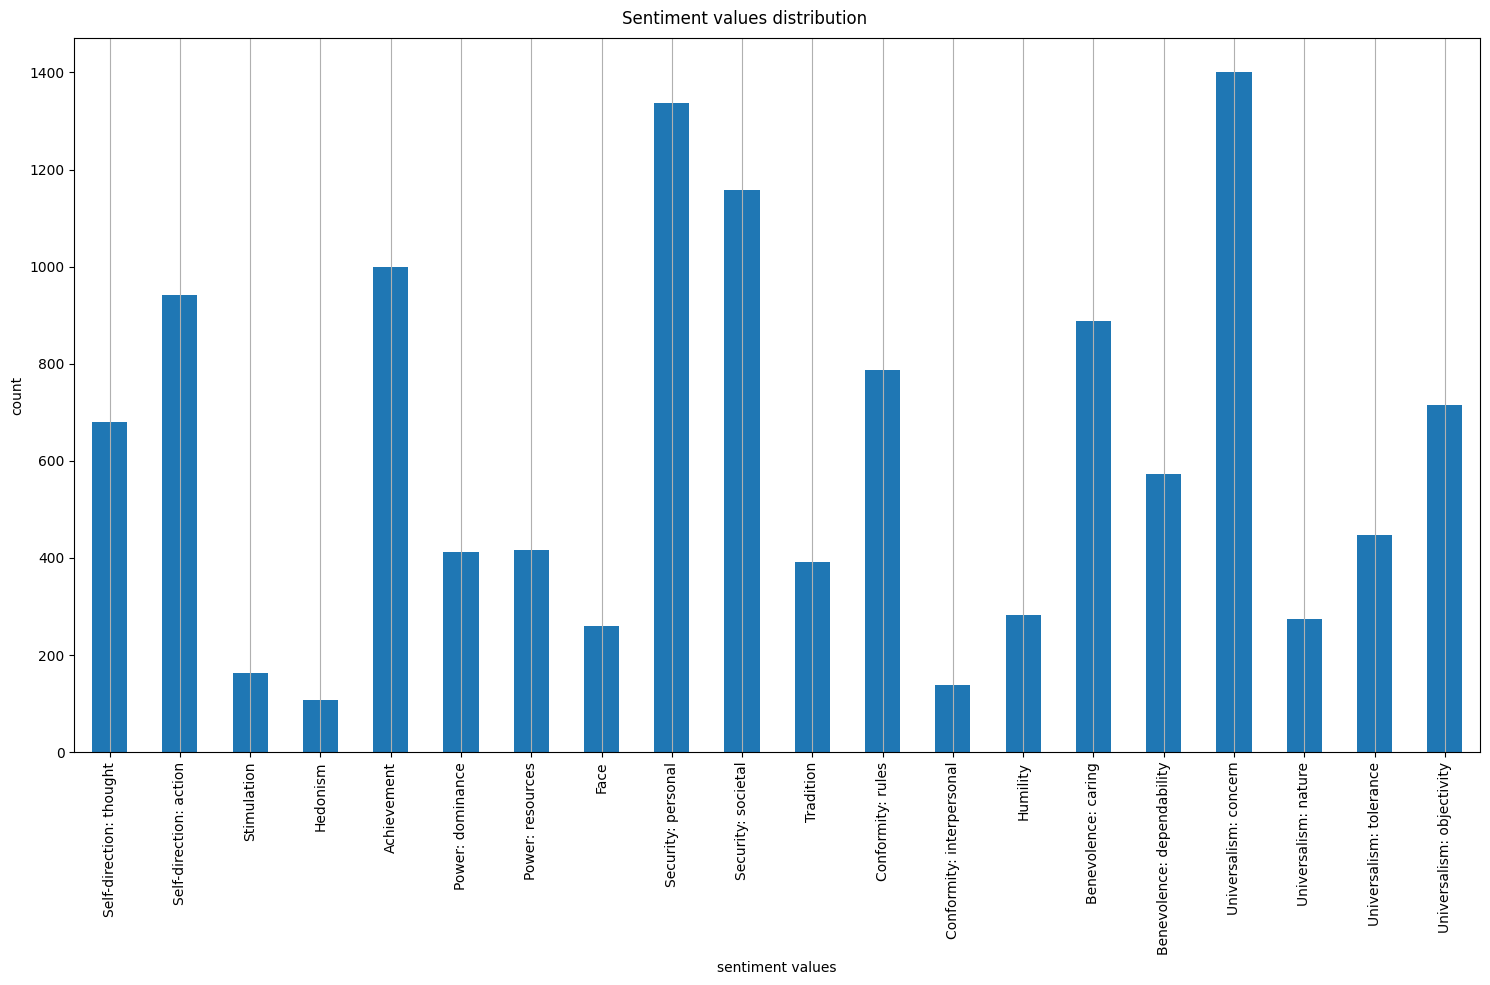

In [13]:
plot_sentiment_distribution(labels_train_df, title='Sentiment values distribution on the train dataframe')
plot_sentiment_distribution(labels_val_df, title='Sentiment values distribution on the validation dataframe')

In [14]:
labels_train_df.shape

(3613, 20)

In [15]:
train_labels_frequencies = (labels_train_df.sum() / len(labels_train_df)).to_numpy()

In [16]:
labels_frequencies = labels_train_df.value_counts() 

In [17]:
import numpy as np

def plot_sequence_length_analysis(arguments_df: pd.DataFrame, df_name: str = 'dataset'):
    """Analyse the length of the premises + stances + conclusions
    Parameters
    ----------
    df : DataFrame
        A pandas dataframe.
    """
    # Length of each training sentence
    train_sentences_lenghts = arguments_df.Premise.str.len() + arguments_df.Conclusion.str.len() + 1

    # Histogram of the sentences length distribution
    hist, bin_edges = np.histogram(train_sentences_lenghts, bins=np.max(train_sentences_lenghts) + 1, density=True) 
    # Cumulative distribution of the sentences length
    C = np.cumsum(hist)*(bin_edges[1] - bin_edges[0])

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(bin_edges[1:], hist)
    plt.title(f'Distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(bin_edges[1:], C)
    plt.title(f'Comulative distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.show()

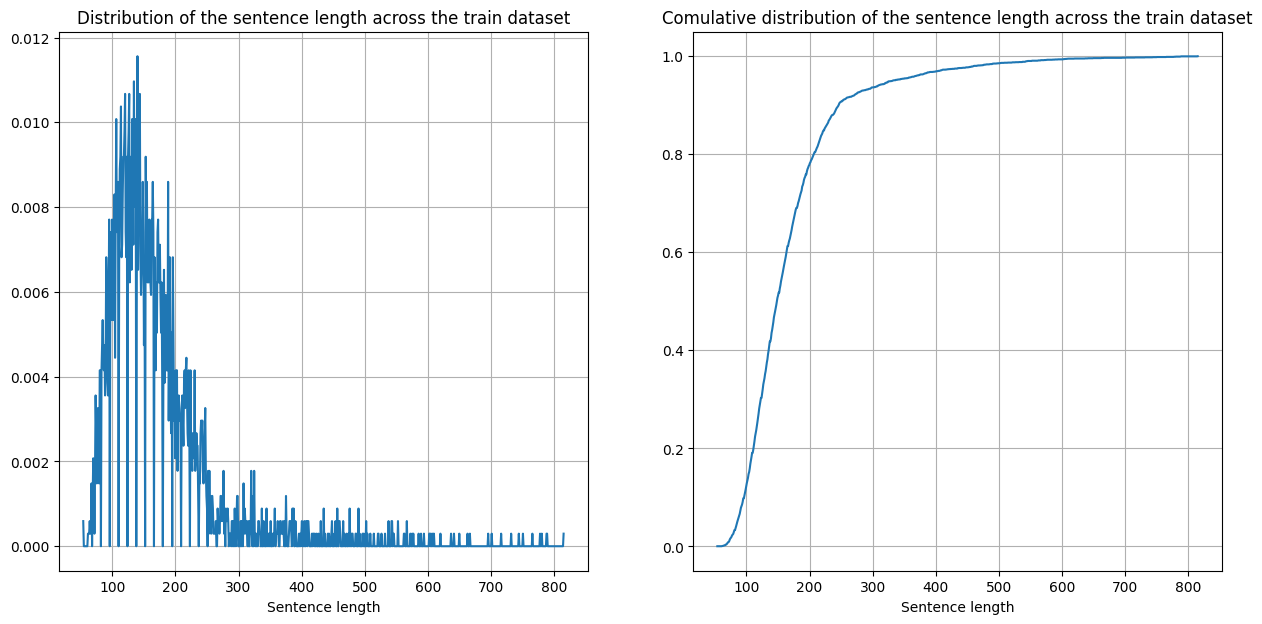

In [18]:
plot_sequence_length_analysis(arguments_train_df, df_name='train dataset')

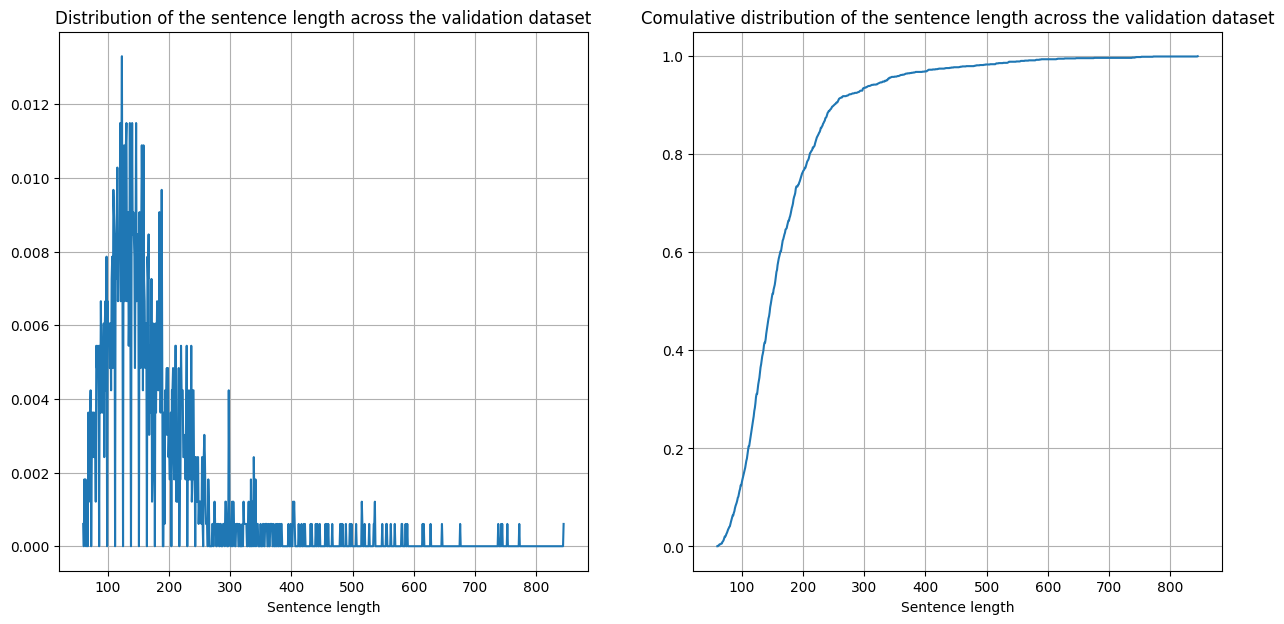

In [19]:
plot_sequence_length_analysis(arguments_val_df, df_name='validation dataset')

In [20]:
quantile_95 = (arguments_train_df.Premise.str.len() + arguments_train_df.Conclusion.str.len() + 1).quantile(.95, interpolation='nearest')

print(f'The 95th quantile of input lengths in the train dataset is: {quantile_95}')

The 95th quantile of input lengths in the train dataset is: 331


In [21]:
total_corpus = arguments_train_df.Conclusion.tolist() + arguments_train_df.Premise.tolist()

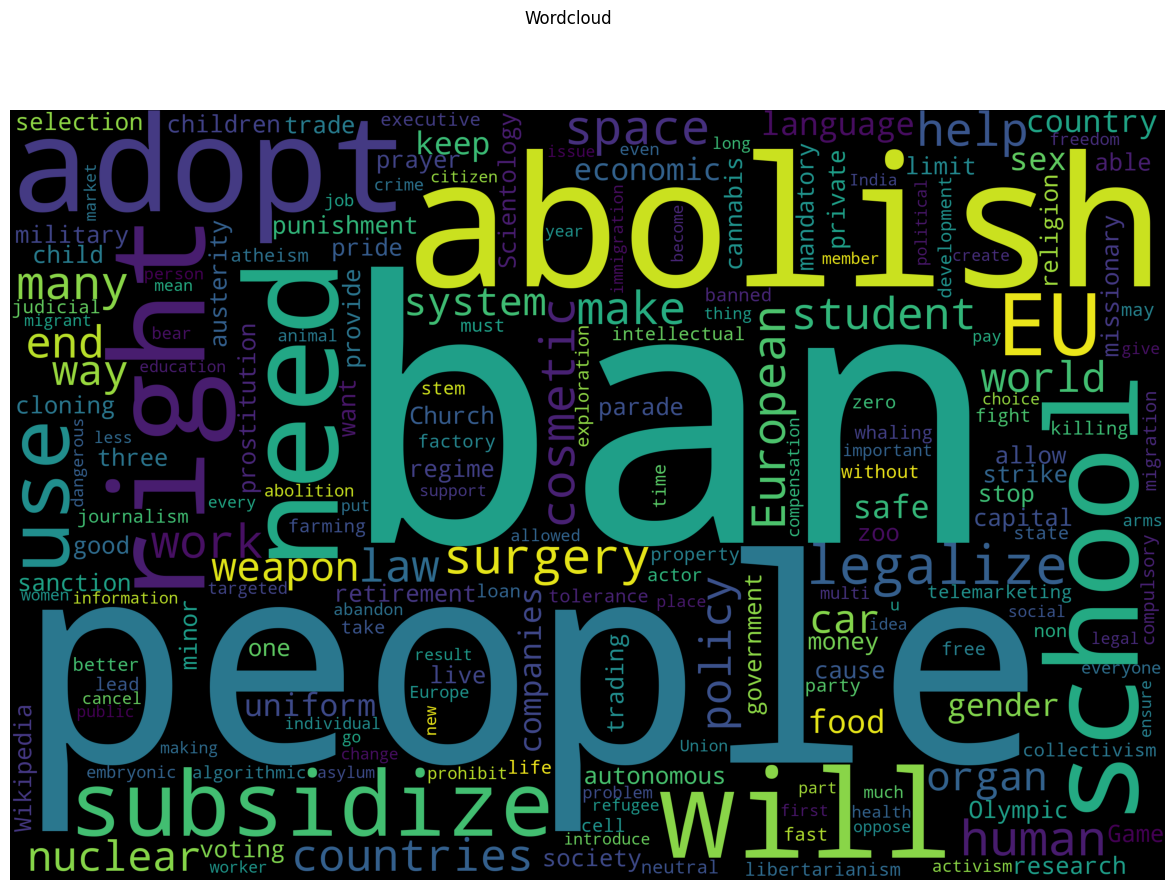

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=3000, height=2000, collocations=False, stopwords=STOPWORDS).generate(' '.join(total_corpus))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud)
plt.suptitle('Wordcloud') 
plt.axis("off")
plt.show()

In [23]:
# Importing the libraries needed
import pandas as pd
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer

In [24]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [25]:
len(labels_train_df.columns.to_list())

20

In [26]:
#label_to_number_dict = {l: i for i, l in enumerate(labels_train_df.columns.to_list()[1:])}
#number_to_label_dict = {i: l for l, i in label_to_number_dict.items()}

In [27]:
#model_name = 'distilbert-base-cased'
model_name = 'roberta-base'

In [28]:
from transformers import AutoTokenizer

# Defining some key variables that will be used later on in the training
MAX_LEN = quantile_95
TRAIN_BATCH_SIZE = 4
VAL_BATCH_SIZE = 4
EPOCHS = 5
LEARNING_RATE_BASE = 1e-05
LEARNING_RATE_HEAD = 1e-03
tokenizer = AutoTokenizer.from_pretrained(model_name, problem_type="multi_label_classification")


num_added_toks = tokenizer.add_tokens(['[FAV]', '[AGN]'], special_tokens=True) ##This line is updated

stance_encoder = {'in favor of': '[FAV]', 'against': '[AGN]'}

###The tokenizer has to be saved if it has to be reused
#tokenizer.save_pretrained(<output_dir>)

In [29]:
# Change from dataframe to numpy

class Triage(Dataset):
    def __init__(self, arguments_df: pd.DataFrame, labels_df: pd.DataFrame, tokenizer, max_len):
        self.len = len(arguments_df)
        self.arguments_data = arguments_df
        self.labels_data = labels_df
        self.tokenizer = tokenizer
        self.max_len = max_len
    # Casual number between 1 and 3 and depending on that give premise conclusion or both.
    def __getitem__(self, index):
        premise = self.arguments_data.Premise[index]
        conclusion = self.arguments_data.Conclusion[index]
        stance = stance_encoder[self.arguments_data.Stance[index]]
        
        whole_text = premise + f' {stance} ' + conclusion
        
        '''inputs = self.tokenizer.encode_plus(
            input_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding=True,
            #return_token_type_ids=False,
            truncation=True
        )'''
        ''' ids = inputs['input_ids']
        mask = inputs['attention_mask']'''

        return premise, conclusion, whole_text, self.labels_data.loc[index].to_list()
    
    def __len__(self):
        return self.len

In [30]:
# Creating the dataset and dataloader for the neural network
train_set = Triage(arguments_train_df, labels_train_df, tokenizer, MAX_LEN)
val_set = Triage(arguments_val_df, labels_val_df, tokenizer, MAX_LEN)
test_set = Triage(arguments_test_df, labels_test_df, tokenizer, MAX_LEN)

In [31]:
from random import sample

def collate_batch(batch: tuple, augment_data: bool):
    input_texts = []
    labels = []
    
    for p, c, w, l in batch:
        # Get random text among premise, conclusion and whole text
        if augment_data:
            [result] = sample([p, c, w], 1)
        else:
            result = w
        input_texts.append(result)
        labels.append(l)
    
    inputs = tokenizer(
        input_texts,
        None,
        add_special_tokens=True,
        max_length=MAX_LEN,
        padding=True,
        truncation=True,
        return_tensors='pt')

    ids = inputs['input_ids']
    mask = inputs['attention_mask']
    
    return {
        'ids': ids,
        'mask': mask,
        'labels': torch.tensor(labels, dtype=torch.float32)
    }

dataloader_params = {
    'num_workers': 0,
    'collate_fn': collate_batch
}

train_params = {'num_workers': 0, 'collate_fn': lambda x: collate_batch(x, augment_data=True), 'shuffle': True,
                'batch_size': TRAIN_BATCH_SIZE}

test_params = {'num_workers': 0, 'collate_fn': lambda x: collate_batch(x, augment_data=False),
              'batch_size': VAL_BATCH_SIZE}


In [32]:
training_loader = DataLoader(train_set, **train_params)
val_loader = DataLoader(val_set, **test_params)
test_loader = DataLoader(test_set, **test_params)

In [33]:
# next(iter(val_loader))

In [34]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
'''
class DistillBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistillBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output'''

'\nclass DistillBERTClass(torch.nn.Module):\n    def __init__(self):\n        super(DistillBERTClass, self).__init__()\n        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")\n        self.pre_classifier = torch.nn.Linear(768, 768)\n        self.dropout = torch.nn.Dropout(0.3)\n        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)\n\n    def forward(self, input_ids, attention_mask):\n        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)\n        hidden_state = output_1[0]\n        pooler = hidden_state[:, 0]\n        pooler = self.pre_classifier(pooler)\n        pooler = torch.nn.ReLU()(pooler)\n        pooler = self.dropout(pooler)\n        output = self.classifier(pooler)\n        return output'

In [35]:
from transformers import AutoModelForSequenceClassification


model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(labels_train_df.columns),
    ignore_mismatched_sizes=True,
    problem_type="multi_label_classification")

model.resize_token_embeddings(len(tokenizer))

model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [36]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha, gamma=1):
        super(FocalLoss, self).__init__()
        self.alpha = torch.tensor(alpha)
        self.gamma = gamma

    def forward(self, inputs, targets):
        
        #train_labels_frequencies
        # bce_loss = F.binary_cross_entropy_with_logits(inputs,  targets.float())
        alpha = self.alpha.to(inputs.device)
        
        probs = inputs.sigmoid()
        
        p_t = targets * probs + (1 - targets) * (1 - probs)
        alpha_t = targets * (1 - alpha) + (1 - targets) * alpha
        
        loss = - alpha_t * (1 - p_t) ** self.gamma * torch.log(p_t)

        return loss.mean()

In [38]:

# Creating the loss function and optimizer
#loss_function = torch.nn.BCEWithLogitsLoss()
loss_function = FocalLoss(train_labels_frequencies)
optimizer = torch.optim.Adam(params=[
                {'params': model.roberta.parameters(), 'lr': LEARNING_RATE_BASE},
                {'params': model.classifier.parameters(), 'lr': LEARNING_RATE_HEAD}
            ])

In [39]:
# Function to calcuate the accuracy of the model
'''
def calculate_accuracy(out, targets, threshold=.5):
    out = out.sigmoid()
    return ((out > threshold) == targets.bool()).float().mean().item()'''

'\ndef calculate_accuracy(out, targets, threshold=.5):\n    out = out.sigmoid()\n    return ((out > threshold) == targets.bool()).float().mean().item()'

In [40]:
import os
from typing import Optional

class Checkpoint():
    def __init__(self, model: AutoModelForSequenceClassification, path: Optional[str] = None) -> None:
        self.model = model
        self.last_metric = .0
        self.path = path if path is not None else os.path.join('checkpoints', 'best_model.pth')

        os.makedirs(os.path.dirname(self.path), exist_ok=True)

    def save_best(self, new_metric: float, **kwargs) -> None:
        #print(self.model.state_dict())
        if new_metric > self.last_metric:
            checkpoint = { k: np.array(v) for k, v in kwargs.items() }
            checkpoint['model_state_dict'] = self.model.state_dict(),

            torch.save(checkpoint, self.path)

        self.last_metric = new_metric
    
    def load_best(self) -> None:
        checkpoint = torch.load(self.path)
        model.load_state_dict(checkpoint['model_state_dict'][0])


In [41]:
class EarlyStopping():
    def __init__(self, patience=5, tolerance=.5) -> None:
        self.patience = patience
        self.tolerance = tolerance
        self.trigger_times = 0
        self.max_metric = 0.
        self.stop_condition = False

    def update(self, metric: float):
        if self.max_metric - metric <= self.tolerance:
            self.trigger_times = 0
            if metric > self.max_metric:
                self.max_metric = metric
        else:
            self.trigger_times += 1

            if self.trigger_times >= self.patience:
                self.stop_condition = True

    def is_stop_condition_met(self):
        return self.stop_condition


In [42]:
from IPython.display import DisplayHandle
import os
import sys
from time import time
from transformers import AutoModelForSequenceClassification
from typing import Optional
from sklearn.metrics import f1_score


'''def get_dataset_predictons(dataloader: DataLoader):
    predictions = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    true_labels = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    
    for batch_idx, data in enumerate(dataloader, 0):
        # Get the data
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
    
        # Compute output
        outputs = model(ids, mask)
        
        #results = outputs.logits.sigmoid()
        results = outputs.logits > 0
        results = results.cpu().numpy()
        results = results.astype(np.uint8)
        
        predictions = np.concatenate((predictions, results), axis=0)
        
        targets = data['labels'].cpu().numpy().astype(np.uint8)
        true_labels = np.concatenate((true_labels, targets), axis=0)
        
        #print(results)
        #print(targets.cpu().numpy().astype(np.uint8))
    return predictions, true_labels'''
    
def get_dataset_predictons(dataloader: DataLoader):
    predictions = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    true_labels = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    
    for batch_idx, data in enumerate(dataloader, 0):
        with torch.no_grad():
            # Get the data
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
        
            # Compute output
            outputs = model(ids, mask)

            preds = outputs.logits
            
            preds = preds.cpu().numpy()
            
            predictions = np.concatenate((predictions, preds), axis=0)

            targets = data['labels'].cpu().numpy().astype(np.uint8)
            true_labels = np.concatenate((true_labels, targets), axis=0)

    return predictions, true_labels

def _loss_validate(val_dataloader: DataLoader, print_result: bool = True):
    print()
    # disp = display('', display_id=True)

    # Variables for accumulating the loss1 and loss2
    running_loss = .0
    running_accuracy = .0

    # Number of evaluated samples
    batch_step = 0

    # Starting time
    start_time = time()

    torch.cuda.empty_cache()

    preds, y_true = get_dataset_predictons(val_dataloader)
    
    loss = loss_function(torch.Tensor(preds).to(device, dtype=torch.float32),
                         torch.Tensor(y_true).to(device, dtype=torch.float32))
    
    y_pred = preds > 0
    y_pred = y_pred.astype(np.uint8)

    f1_macro = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

    
    final_time = time() - start_time
    
    if print_result:
        print(
            f'validate: ' +
            f'{final_time:.0f}s, ' +
            f'validation loss: {loss:.3g}, '
            f'validation f1 macro: {f1_macro * 100:.3g} %' +
            '               '
            )

    return loss, f1_macro



def train(train_dataloader: DataLoader, val_dataloader: DataLoader, model: AutoModelForSequenceClassification, 
          epochs: int = 5, steps_validate: int = 100, checkpoint_path: Optional[str] = None,
          reload_best_weights: bool = True) -> None:

    checkpoint = Checkpoint(model, checkpoint_path)
    # Create path to save checkpoints
    '''if checkpoint_path is None:
        checkpoint_path = os.path.join('checkpoints', 'checkpoints.pth')''';

    #os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
    
    early_stopping = EarlyStopping()
    
    train_loss_history = []
    val_loss_history = []
    val_f1_macro_history = []

    # Total steps to perform
    # tot_steps = len(train_dataloader) * epochs
    # Number of step already done
    n_steps = 0
    
    model.train()

    # Iterate across the epochs
    for epoch in range(epochs):
        # Set up display element
        #disp = display('', display_id=True)

        # Remove unused tensors from gpu memory
        torch.cuda.empty_cache()

        # Initialize running losses
        running_loss = 0.0
        
        optimizer.zero_grad()

        start_time = time()

        # Number of batches for the current update step
        batch_steps = 0

        for batch_idx, data in enumerate(train_dataloader, 0):
            # Increment the number of batch steps
            batch_steps += 1

            # Get the data
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['labels'].to(device, dtype = torch.float32)
        
            # Compute output
            outputs = model(ids, mask)
            
            # Loss
            loss = loss_function(outputs.logits, targets)
            running_loss += loss.item()

            optimizer.zero_grad()
            #nb_tr_steps += 1
            loss.backward()
            
            # When using GPU
            optimizer.step()

            # Evaluate on validation set
            if batch_idx % steps_validate == steps_validate - 1:
                torch.cuda.empty_cache()
                # Compute both the token importances validation loss and the answer generation validation loss
                val_loss, val_f1_macro = _loss_validate(val_dataloader)
                
                # Update validation loss history
                val_loss_history.append([n_steps, val_loss.item()])
                val_f1_macro_history.append([n_steps, val_f1_macro])

                torch.cuda.empty_cache()
                
                checkpoint.save_best(val_f1_macro, train_loss_history=train_loss_history, val_loss_history=val_loss_history,
                                     val_f1_macro_history=val_f1_macro_history)
                
                early_stopping.update(val_f1_macro)

                if early_stopping.is_stop_condition_met():
                    print('Early stopping')
                    return train_loss_history, val_loss_history, val_f1_macro_history


            # Update training history and print           
            train_loss_history.append(loss.item())
            
            epoch_time = time() - start_time
            batch_time = epoch_time / (batch_idx + 1)
            
            # TODO: function to print batch string
            print(
                f'epoch: {epoch + 1}/{epochs}, ' +
                f'{batch_idx + 1}/{len(train_dataloader)}, '
                f'{epoch_time:.0f}s {batch_time * 1e3:.0f}ms/step, ' +
                f'lr base: {optimizer.param_groups[0]["lr"]:.3g} lr head: {optimizer.param_groups[1]["lr"]:.3g}, ' +
                f'loss: {running_loss / batch_steps:.3g}, ' +
                '               ',
                end='\r'
                )

            n_steps += 1

        torch.cuda.empty_cache()
        # Compute both the token importances validation loss and the answer generation validation loss
        val_loss, val_f1_macro = _loss_validate(val_dataloader, print_result=False)
        # Update validation loss history
        val_loss_history.append([n_steps, val_loss.item()])
        val_f1_macro_history.append([n_steps, val_f1_macro])

        torch.cuda.empty_cache()

        print('-----------------------------------------------------------------------------------------------')
        print(
            f'epoch: {epoch + 1}/{epochs}, ' +
            f'{epoch_time:.0f}s, ' +
            f'lr base: {optimizer.param_groups[0]["lr"]:.3g} lr head: {optimizer.param_groups[1]["lr"]:.3g}, ' +
            f'loss: {running_loss / batch_steps:.3g} val loss:, {val_loss:.3g}, ' + 
            f'val f1 macro: {val_f1_macro * 100:.3g} %'
            )
        print('===============================================================================================')
        
        checkpoint.save_best(val_f1_macro, train_loss_history=train_loss_history, val_loss_history=val_loss_history,
                        val_f1_macro_history=val_f1_macro_history)

        early_stopping.update(val_f1_macro)

        if early_stopping.is_stop_condition_met():
            print('Early stopping')
            return train_loss_history, val_loss_history, val_f1_macro_history

    if reload_best_weights:
        checkpoint.load_best()

    return np.array(train_loss_history), np.array(val_loss_history), np.array(val_f1_macro_history)


In [43]:
train_loss_history, val_loss_history, val_f1_macro_history = train(training_loader, val_loader, model, epochs=EPOCHS,
                                                                   steps_validate=200)

epoch: 1/5, 199/904, 25s 126ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0896,                
validate: 15s, validation loss: 0.0825, validation f1 macro: 36.1 %               
epoch: 1/5, 399/904, 71s 177ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0865,                
validate: 11s, validation loss: 0.0776, validation f1 macro: 38.8 %               
epoch: 1/5, 599/904, 106s 177ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0842,                
validate: 14s, validation loss: 0.0766, validation f1 macro: 41.1 %               
epoch: 1/5, 799/904, 150s 188ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0833,                
validate: 10s, validation loss: 0.0763, validation f1 macro: 39.5 %               
epoch: 1/5, 904/904, 176s 194ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0828,                
-----------------------------------------------------------------------------------------------
epoch: 1/5, 176s, lr base: 1e-05 lr head: 0.001, loss: 0.0828 val loss:, 0.0754

In [44]:
'''checkpoint = torch.load('checkpoints/best_model.pth')

# Get loss history and validation loss history
model.load_state_dict(checkpoint['model_state_dict'][0])
train_loss_history = checkpoint['train_loss_history']
val_loss_history = checkpoint['val_loss_history']
val_f1_macro_history = checkpoint['val_f1_macro_history']''';

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def _plot_loss_subplot(train_loss_history: np.ndarray, val_loss_history: np.ndarray, subplot_index: int, n_batches: int,
                       use_log_scale: bool = False) -> None:
    plt.subplot(2, 2, subplot_index)

    plt.title(f'Loss history{" using log scale" if use_log_scale else ""}')

    plt.plot(train_loss_history, label='Training loss')
    
    averaged_train_history = np.convolve(train_loss_history, np.ones(n_batches)/n_batches, mode='valid')
    
    plt.plot(np.linspace(0, len(train_loss_history), len(averaged_train_history)), averaged_train_history,
             label=f'Training loss averaged on {n_batches} batches')

    # Plot validation history if present
    plt.plot(val_loss_history[:,0], val_loss_history[:,1], 'r*', label=f'Validation loss')
    
    plt.xlabel('iterations')
    
    # Use log scale if specified
    if use_log_scale:
        plt.yscale('log')
        plt.ylabel(f'loss (log)')
    else:
        plt.ylabel('loss')

    plt.legend()
    
def _plot_f1_subplot(validation_f1_history: np.ndarray, subplot_index: int) -> None:
    plt.subplot(2, 1, subplot_index)

    plt.title(f'F1 macro history on the validation set')

    #plt.plot(val_f1_macro_history)
    plt.plot(validation_f1_history[:,0], validation_f1_history[:,1], 'r')
    
    # averaged_train_history = np.convolve(train_history, np.ones(n_batches)/n_batches, mode='valid')
    
    #plt.plot(np.linspace(0, len(train_history), len(averaged_train_history)), averaged_train_history,
    #         label=f'Training {metric} averaged on {n_batches} batches')
    
    #plt.plot(np.convolve(training_loss_history[:,loss_index], np.ones(n_batches)/n_batches, mode='valid'), 
    #         label=f'Training loss averaged on {n_batches} batches')

    # Plot validation history if present
    #plt.plot(validation_history[:,0], validation_history[:,1], 'r*', label=f'Validation {metric}')
    
    plt.xlabel('iterations')
    
    # Use log scale if specified
    #if use_log_scale:
    #    plt.yscale('log')
    #    plt.ylabel(f'{metric} (log)')
    #else:
    plt.ylabel('F1 macro')

    #plt.legend()


def plot_training_history(train_loss_history: np.ndarray, val_loss_history: np.ndarray,
                          val_f1_macro_history: np.ndarray) -> None:
    n_batches = 50

    plt.figure(figsize=(15,12))
    plt.subplot(2, 2, 1)
    plt.suptitle('Training procedure analysis')
    
    # Plot loss history
    _plot_loss_subplot(train_loss_history, val_loss_history, 1, n_batches, use_log_scale=False)
    
    # Plot log loss history
    _plot_loss_subplot(train_loss_history, val_loss_history, 2, n_batches, use_log_scale=True)

    # Plot validation F1 history
    _plot_f1_subplot(val_f1_macro_history, 2)

    # Plot loss history of the Seq2seq module in log scale
    #_plot_loss_subplot(train_accuracy_history, validation_accuracy_history, 4, n_batches, use_log_scale=True)
    
    plt.show()

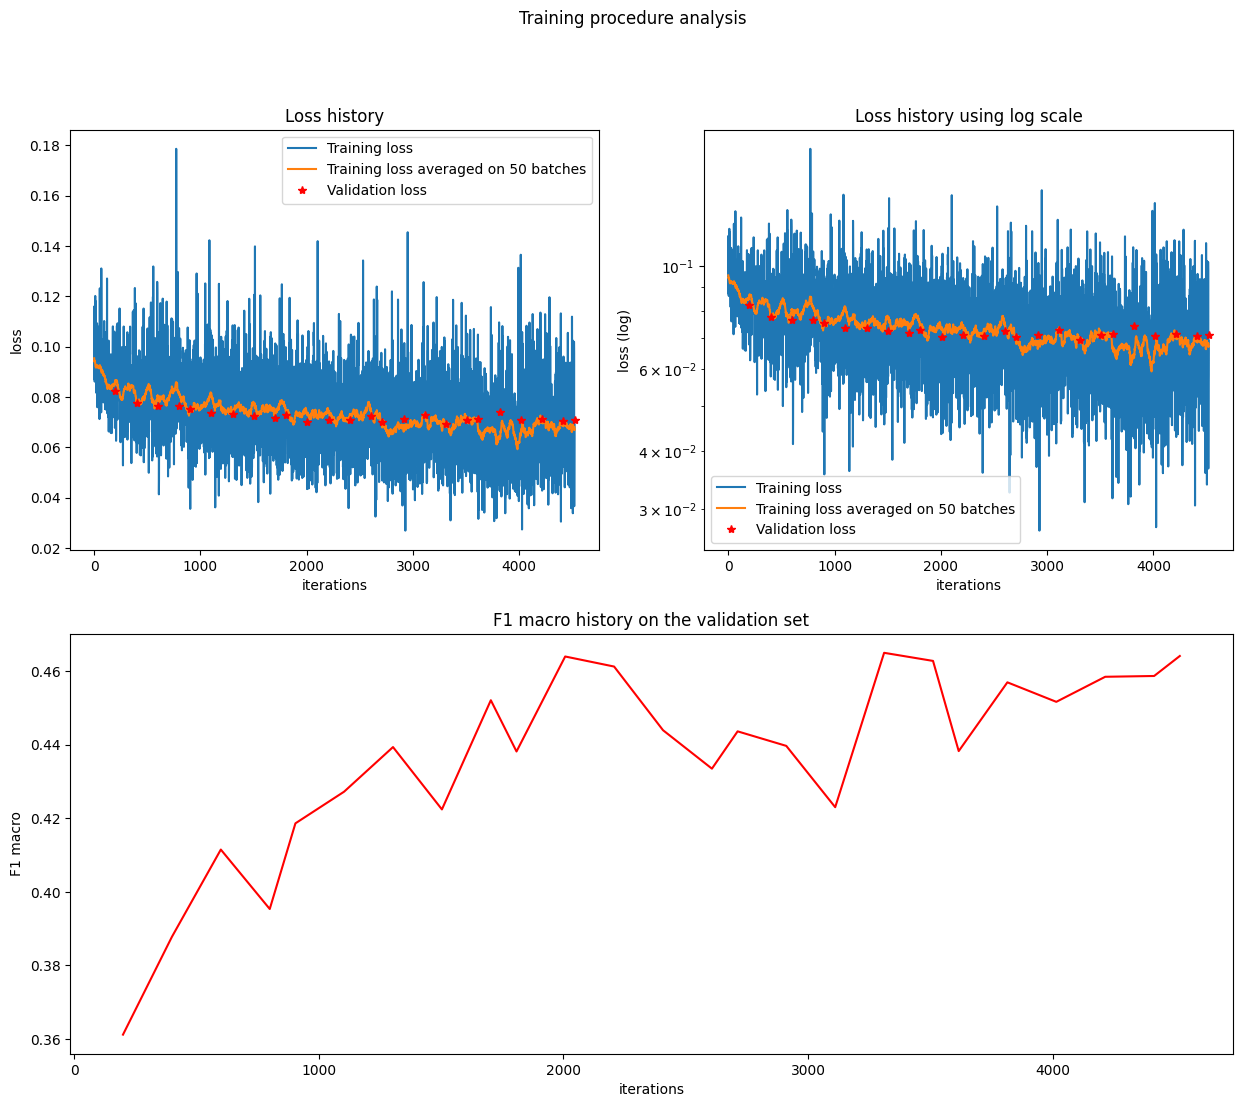

In [46]:
plot_training_history(np.array(train_loss_history), np.array(val_loss_history), np.array(val_f1_macro_history))

In [47]:
def predict(dataloader: DataLoader):
    preds, y_true = get_dataset_predictons(dataloader)
    preds = preds > 0
    preds = preds.astype(np.uint8)

    return preds, y_true

In [48]:
# Validation f1-score
from sklearn.metrics import f1_score

y_pred, y_true = predict(val_loader)
f1_macro = f1_score(y_true=y_true, y_pred=y_pred, average='macro')
print(f'Validation f1-score macro on the validation set: {f1_macro:.3f}')

Validation f1-score macro on the validation set: 0.468


In [49]:
from sklearn.metrics import classification_report

class_report_val = classification_report(y_true=y_true, y_pred=y_pred, target_names=labels_train_df.columns.to_list(),
                                     zero_division=0, output_dict=True)

print('Classification report for the validation set:')
print(classification_report(y_true=y_true, y_pred=y_pred,
                            target_names=labels_train_df.columns.to_list(), zero_division=0))

Classification report for the validation set:
                            precision    recall  f1-score   support

   Self-direction: thought       0.60      0.66      0.63       308
    Self-direction: action       0.58      0.71      0.64       454
               Stimulation       0.09      0.64      0.16        84
                  Hedonism       0.17      0.62      0.27        65
               Achievement       0.63      0.68      0.65       512
          Power: dominance       0.31      0.58      0.40       198
          Power: resources       0.51      0.71      0.59       209
                      Face       0.10      0.89      0.18       122
        Security: personal       0.65      0.83      0.73       662
        Security: societal       0.73      0.63      0.68       571
                 Tradition       0.33      0.78      0.47       176
         Conformity: rules       0.46      0.61      0.52       389
 Conformity: interpersonal       0.12      0.83      0.21        69
 

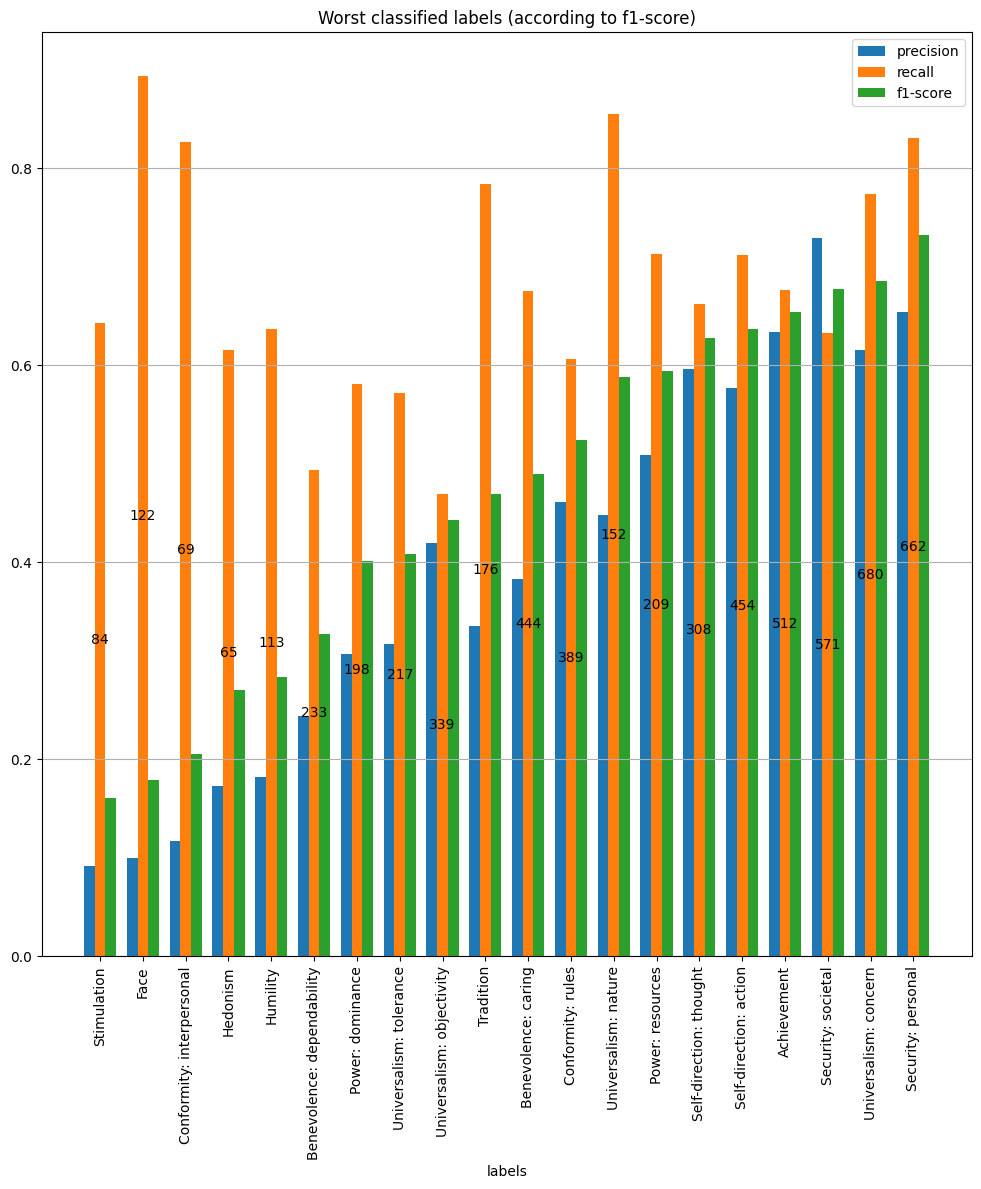

In [50]:
from typing import OrderedDict

class_report_sorted = sorted([(class_report_val[label]['f1-score'], label) 
                            for label in class_report_val.keys() if label in labels_train_df.columns.to_list() ])

class_report_sorted = OrderedDict({label:class_report_val[label] for (f1_score, label) in class_report_sorted})

plt.figure(figsize=(12,12))
x_axis = 2*np.arange(len(class_report_sorted))
plt.bar(x_axis-0.5, [class_report_sorted[tag]['precision'] for tag in class_report_sorted], label='precision', width=0.5)
b = plt.bar(x_axis, [class_report_sorted[tag]['recall'] for tag in class_report_sorted], label='recall', width=0.5)
plt.bar(x_axis+0.5, [class_report_sorted[tag]['f1-score'] for tag in class_report_sorted], label='f1-score', width=0.5)
plt.bar_label(b, labels=[class_report_sorted[tag]['support'] for tag in class_report_sorted], label_type='center')
plt.xticks(x_axis, list(class_report_sorted.keys()))
plt.grid(axis='y')
plt.legend()
plt.xticks(rotation=90)
plt.title('Worst classified labels (according to f1-score)')
plt.xlabel('labels')
plt.show()


In [51]:
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrix = multilabel_confusion_matrix(y_true, y_pred).astype(np.float32)

print(confusion_matrix)

#confusion_matrix[,:]confusion_matrix[,:] / confusion_matrix.astype(np.float).sum(axis=(0, 1))


[[[1334.  138.]
  [ 104.  204.]]

 [[1089.  237.]
  [ 131.  323.]]

 [[1160.  536.]
  [  30.   54.]]

 [[1524.  191.]
  [  25.   40.]]

 [[1068.  200.]
  [ 166.  346.]]

 [[1322.  260.]
  [  83.  115.]]

 [[1427.  144.]
  [  60.  149.]]

 [[ 671.  987.]
  [  13.  109.]]

 [[ 827.  291.]
  [ 112.  550.]]

 [[1075.  134.]
  [ 210.  361.]]

 [[1330.  274.]
  [  38.  138.]]

 [[1115.  276.]
  [ 153.  236.]]

 [[1281.  430.]
  [  12.   57.]]

 [[1344.  323.]
  [  41.   72.]]

 [[ 853.  483.]
  [ 144.  300.]]

 [[1191.  356.]
  [ 118.  115.]]

 [[ 771.  329.]
  [ 154.  526.]]

 [[1468.  160.]
  [  22.  130.]]

 [[1296.  267.]
  [  93.  124.]]

 [[1221.  220.]
  [ 180.  159.]]]


In [52]:
from copy import deepcopy

def get_normalized_confusion_matrices(confusion_matrices: np.ndarray, normalize_by: str = 'recall'):
    assert normalize_by in ['recall', 'precision', 'accuracy'], \
        'Select one normalization metric among: recall, precision or accuracy'
    
    confusion_matrices = deepcopy(confusion_matrices)
    
    for i in range(confusion_matrices.shape[0]):
        if normalize_by == 'accuracy':
            confusion_matrices[i] = confusion_matrix[i] / confusion_matrix[i].sum()
        elif normalize_by == 'precision':
            confusion_matrices[i] = confusion_matrix[i] / confusion_matrix[i].sum(axis=0)
        elif normalize_by == 'recall':
            confusion_matrices[i] = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)

    return confusion_matrices
    

In [53]:
confusion_matrix_recall = get_normalized_confusion_matrices(confusion_matrix)

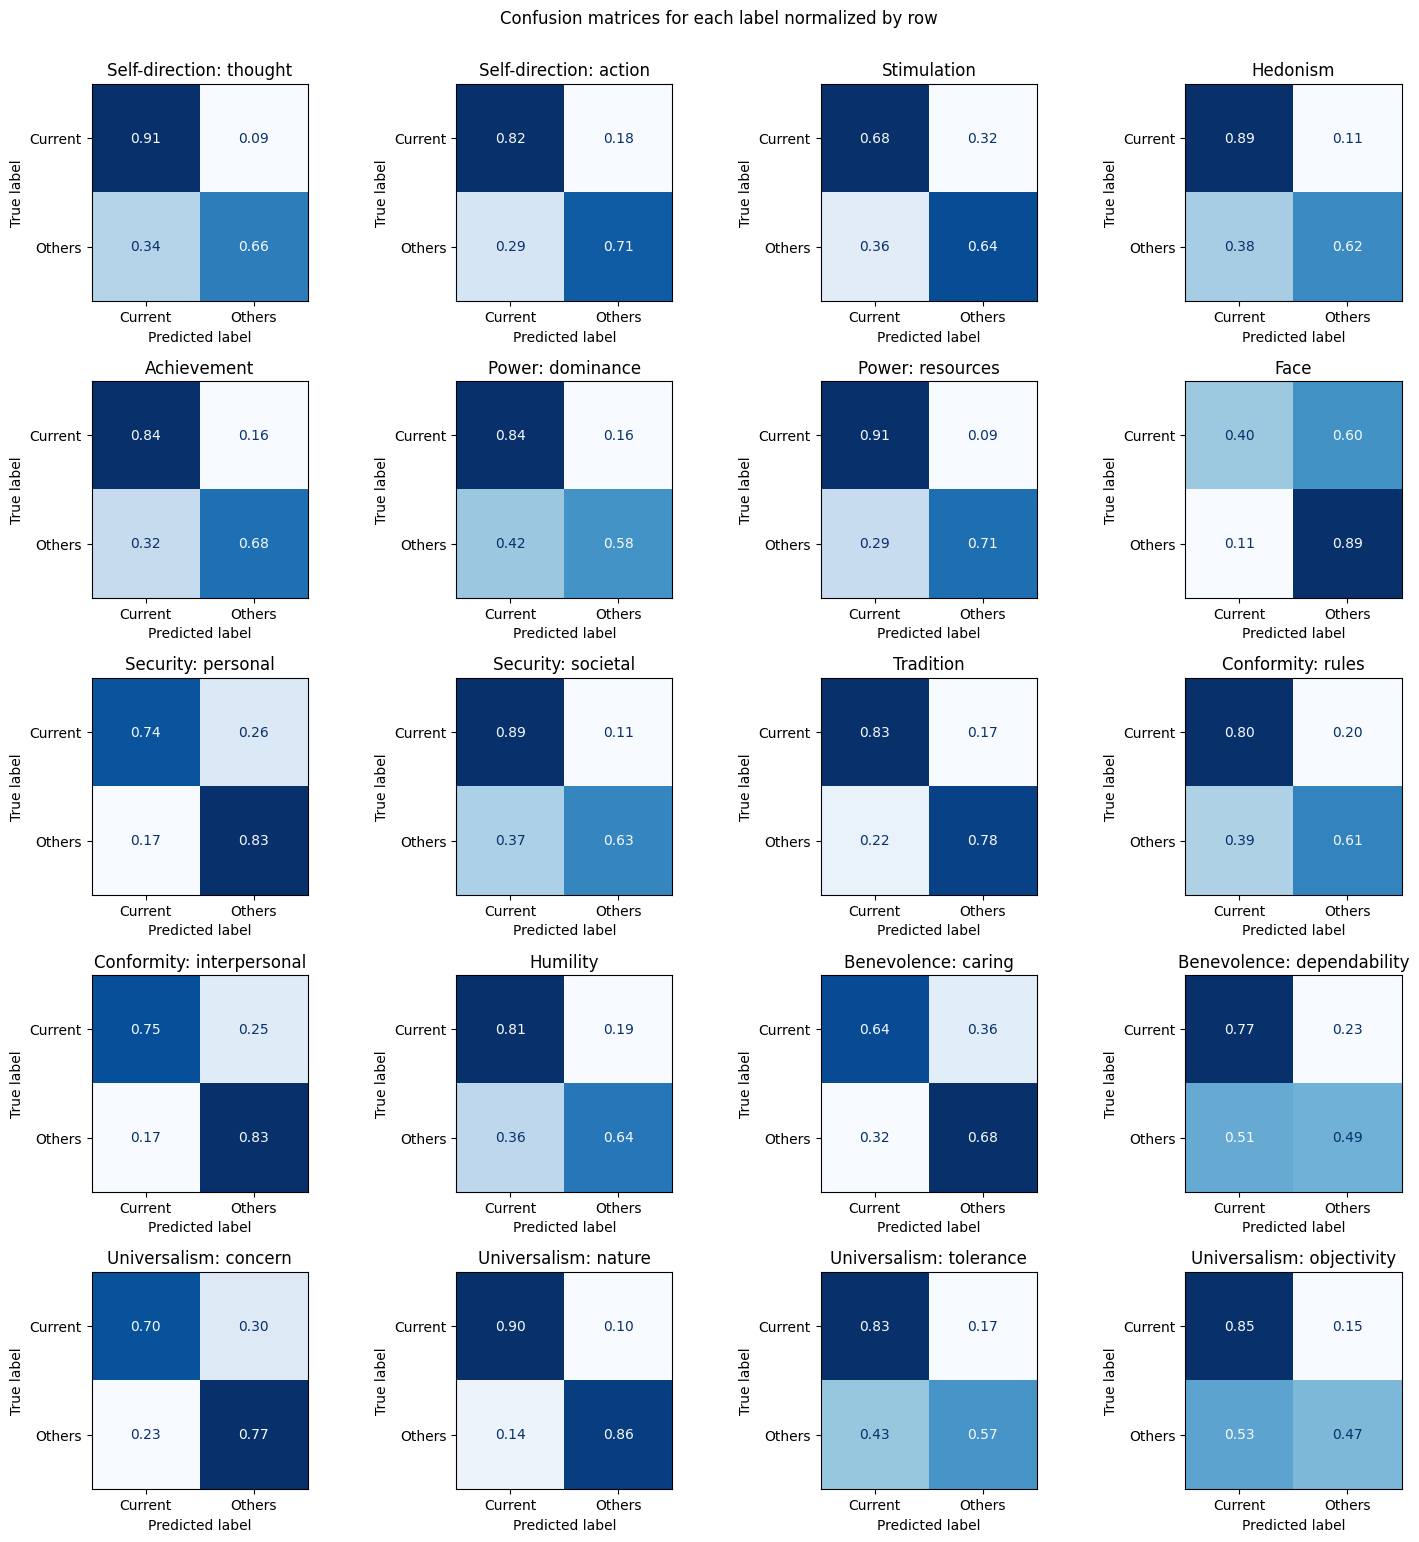

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(5, 4, figsize=(15, 15))

for i, (matrix, label) in enumerate(zip(confusion_matrix_recall, labels_train_df.columns.to_list())):
    ax = plt.subplot(5, 4, i + 1)
    cf = ConfusionMatrixDisplay(matrix, display_labels=['Current', 'Others'])
    cf.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax, colorbar=False)
    ax.set_title(label)
    
fig.tight_layout()

plt.suptitle('Confusion matrices for each label normalized by row', y=1.025)

plt.show()


In [55]:
from sklearn.metrics import f1_score

y_pred, y_true = predict(test_loader)
f1_macro = f1_score(y_true=y_true, y_pred=y_pred, average='macro')
print(f'Test f1-score macro on the validation set: {f1_macro:.3f}')

Test f1-score macro on the validation set: 0.435


In [56]:
from sklearn.metrics import classification_report

class_report_test = classification_report(y_true=y_true, y_pred=y_pred, target_names=labels_train_df.columns.to_list(),
                                     zero_division=0, output_dict=True)

print('Classification report for the test set:')
print(classification_report(y_true=y_true, y_pred=y_pred,
                            target_names=labels_train_df.columns.to_list(), zero_division=0))

Classification report for the test set:
                            precision    recall  f1-score   support

   Self-direction: thought       0.46      0.52      0.49       251
    Self-direction: action       0.47      0.62      0.54       496
               Stimulation       0.16      0.67      0.26       138
                  Hedonism       0.22      0.57      0.32       103
               Achievement       0.63      0.65      0.64       575
          Power: dominance       0.27      0.47      0.34       164
          Power: resources       0.42      0.59      0.49       132
                      Face       0.10      0.85      0.18       130
        Security: personal       0.66      0.84      0.74       759
        Security: societal       0.69      0.60      0.64       488
                 Tradition       0.30      0.56      0.40       172
         Conformity: rules       0.51      0.62      0.56       455
 Conformity: interpersonal       0.08      0.62      0.14        60
       

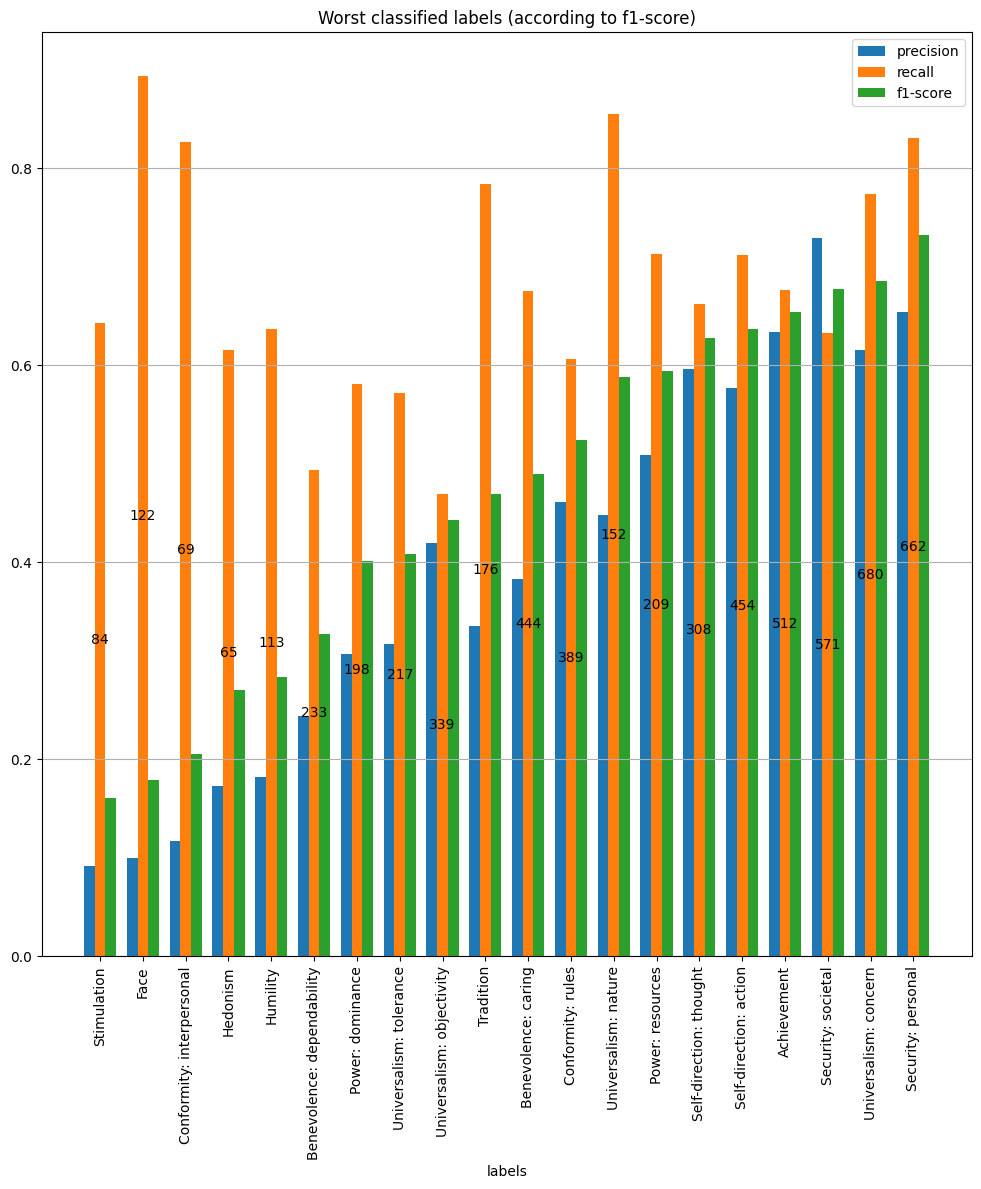

In [57]:
from typing import OrderedDict

class_report_sorted = sorted([(class_report_val[label]['f1-score'], label) 
                            for label in class_report_val.keys() if label in labels_train_df.columns.to_list() ])

class_report_sorted = OrderedDict({label:class_report_val[label] for (f1_score, label) in class_report_sorted})

plt.figure(figsize=(12,12))
x_axis = 2*np.arange(len(class_report_sorted))
plt.bar(x_axis-0.5, [class_report_sorted[tag]['precision'] for tag in class_report_sorted], label='precision', width=0.5)
b = plt.bar(x_axis, [class_report_sorted[tag]['recall'] for tag in class_report_sorted], label='recall', width=0.5)
plt.bar(x_axis+0.5, [class_report_sorted[tag]['f1-score'] for tag in class_report_sorted], label='f1-score', width=0.5)
plt.bar_label(b, labels=[class_report_sorted[tag]['support'] for tag in class_report_sorted], label_type='center')
plt.xticks(x_axis, list(class_report_sorted.keys()))
plt.grid(axis='y')
plt.legend()
plt.xticks(rotation=90)
plt.title('Worst classified labels (according to f1-score)')
plt.xlabel('labels')
plt.show()


In [58]:
confusion_matrix_recall = get_normalized_confusion_matrices(confusion_matrix)

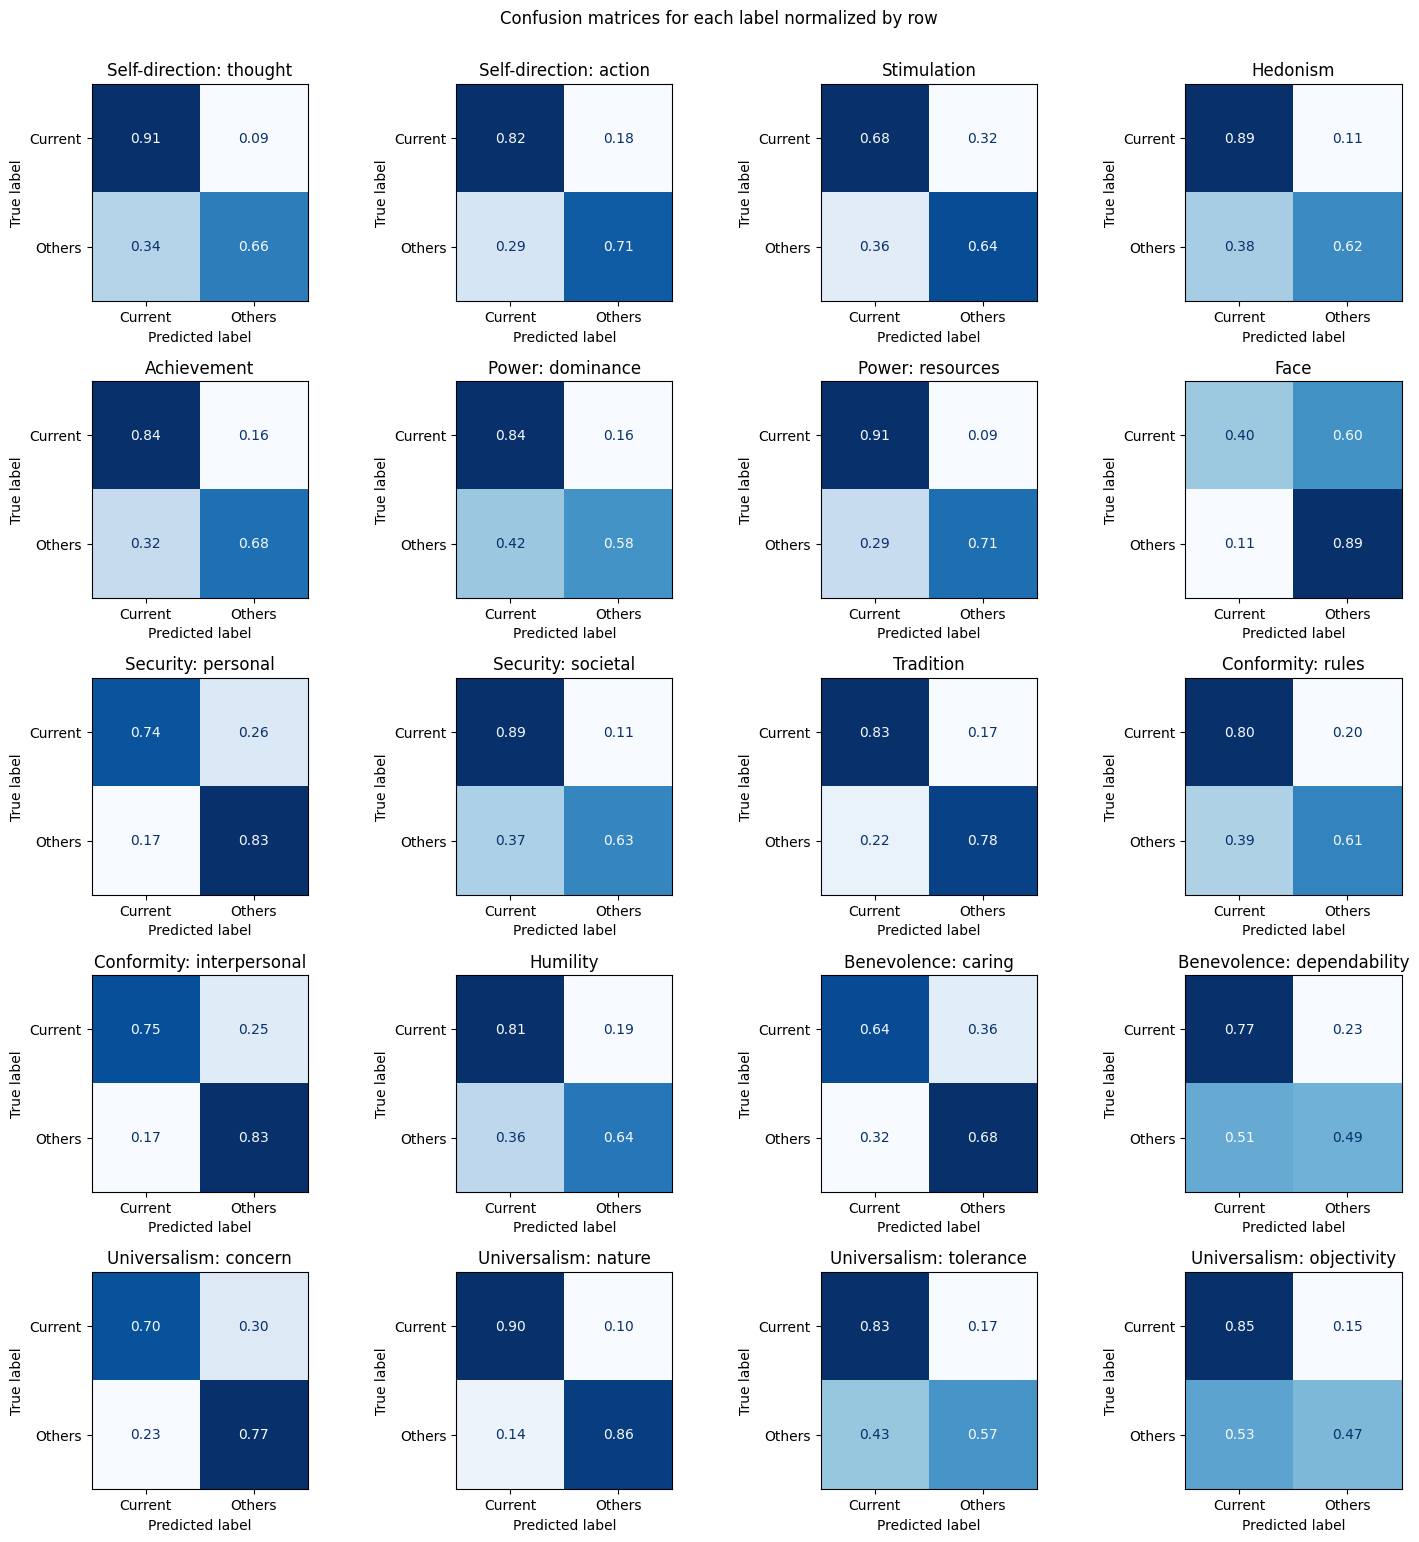

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(5, 4, figsize=(15, 15))

for i, (matrix, label) in enumerate(zip(confusion_matrix_recall, labels_train_df.columns.to_list())):
    ax = plt.subplot(5, 4, i + 1)
    cf = ConfusionMatrixDisplay(matrix, display_labels=['Current', 'Others'])
    cf.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax, colorbar=False)
    ax.set_title(label)
    
fig.tight_layout()

plt.suptitle('Confusion matrices for each label normalized by row', y=1.025)

plt.show()